# Retrival

## Import Libraries

In [1]:
%pip show transformers || pip install transformers

Name: transformers
Version: 4.46.1
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: c:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import json
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Check GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


## Explore Data

In [4]:
# Define paths to your data
json_folder_path = 'data/StructuredRegulatoryDocuments'  # Replace with the path to your JSON files
questions_file_path = 'data/ObliQA_train.json'  # Replace with the path to your questions file

# Load all JSON documents
documents = []
for file_name in os.listdir(json_folder_path):
    if file_name.endswith('.json'):
        with open(os.path.join(json_folder_path, file_name), 'r') as file:
            document = json.load(file)
            documents.append(document)

# Load questions dataset
if questions_file_path.endswith('.csv'):
    questions = pd.read_csv(questions_file_path)
elif questions_file_path.endswith('.json'):
    questions = pd.read_json(questions_file_path)

# Check the data
print("Loaded documents:", len(documents))


Loaded documents: 40


In [5]:
# Create a list to hold the passage data
passages_data = []

# Populate the passages_data list with dictionaries
for doc in documents:
    for passage in doc:
        passages_data.append(passage)

# Create a DataFrame from the passages_data list
passages = pd.DataFrame(passages_data)

In [6]:
passages

,ID,DocumentID,PassageID,Passage
0,bd35fb2d-4de6-48fb-ab3c-baead722854f,1,1.,INTRODUCTION
1,e563ad09-df80-435c-a497-eeec420efbc4,1,1.1,Jurisdiction
2,8edbc54b-4d98-4417-a4b7-3531b6f80f8c,1,1.1.1,
3,1389d0fa-5346-4953-8d52-45d7fd96c5e8,1,1.1.1.(1),The AML Rulebook is made in recognition of the...
4,23368989-55c6-4940-abc6-d7a8d2d1071b,1,1.1.1.(2),Nothing in the AML Rulebook affects the operat...
...,...,...,...,...
13727,08654e6d-9d61-4425-9ff6-076f0afb4715,9,APP 1.A1.1.1,This table forms part of IFR ‎7.3.2.
13728,2cee115d-1aec-422b-92ec-7c13b014f2d3,9,APP 1.A1.1.2,"A Listed Entity must, on the occurrence of an ..."
13729,86f3e627-1b68-43d1-ac10-c2ab0beb5e4b,9,APP 1.A1.2,Other continuing obligations for listed entities
13730,c7b17dbf-a6a6-49a7-8be3-eb706473a99e,9,APP 1.A1.2.1,This table forms part of IFR ‎7.3.2.


In [7]:
# passages.dropna()

In [8]:
questions

,QuestionID,Question,Passages,Group
0,a10724b5-ad0e-4b69-8b5e-792aef214f86,"Under Rules 7.3.2 and 7.3.3, what are the two ...","[{'DocumentID': 11, 'PassageID': '7.3.4', 'Pas...",1
1,3382f629-e1c0-49dd-9bd0-61ed0bdce2e6,**Best Execution and Transaction Handling**: W...,"[{'DocumentID': 3, 'PassageID': '17.1.4', 'Pas...",10
2,7073c16e-1974-4051-9064-9f5706c663c7,"How does the FSRA define and evaluate ""princip...","[{'DocumentID': 11, 'PassageID': '10.1.7.(2)',...",4
3,402bc55d-3881-4239-a9ee-bee60f4e9d3d,How soon is the Registrar of Companies expecte...,"[{'DocumentID': 1, 'PassageID': '15.9.1.(3)', ...",1
4,5fc3ea5d-071f-4097-acc2-2c89bdec9257,Can the ADGM provide examples of legal risks a...,"[{'DocumentID': 13, 'PassageID': '4.14.3', 'Pa...",2
...,...,...,...,...
22290,de3549e1-7932-41ca-9d61-9ed7d2aa5684,Can you provide guidance on how frequently upd...,"[{'DocumentID': 19, 'PassageID': '77)', 'Passa...",3
22291,20090265-816f-40a1-a409-fc40821e99f7,What are the reporting requirements for Financ...,"[{'DocumentID': 15, 'PassageID': 'Part 3.6.(2)...",2
22292,c39248e5-d896-4fb5-9c47-d005ec8e9124,What are the penalties for non-compliance with...,"[{'DocumentID': 1, 'PassageID': '2.Guidance.11...",2
22293,1683a365-753c-4a72-87cb-f07941d2d327,If a communication references an investment th...,"[{'DocumentID': 17, 'PassageID': 'Schedule 2.1...",1


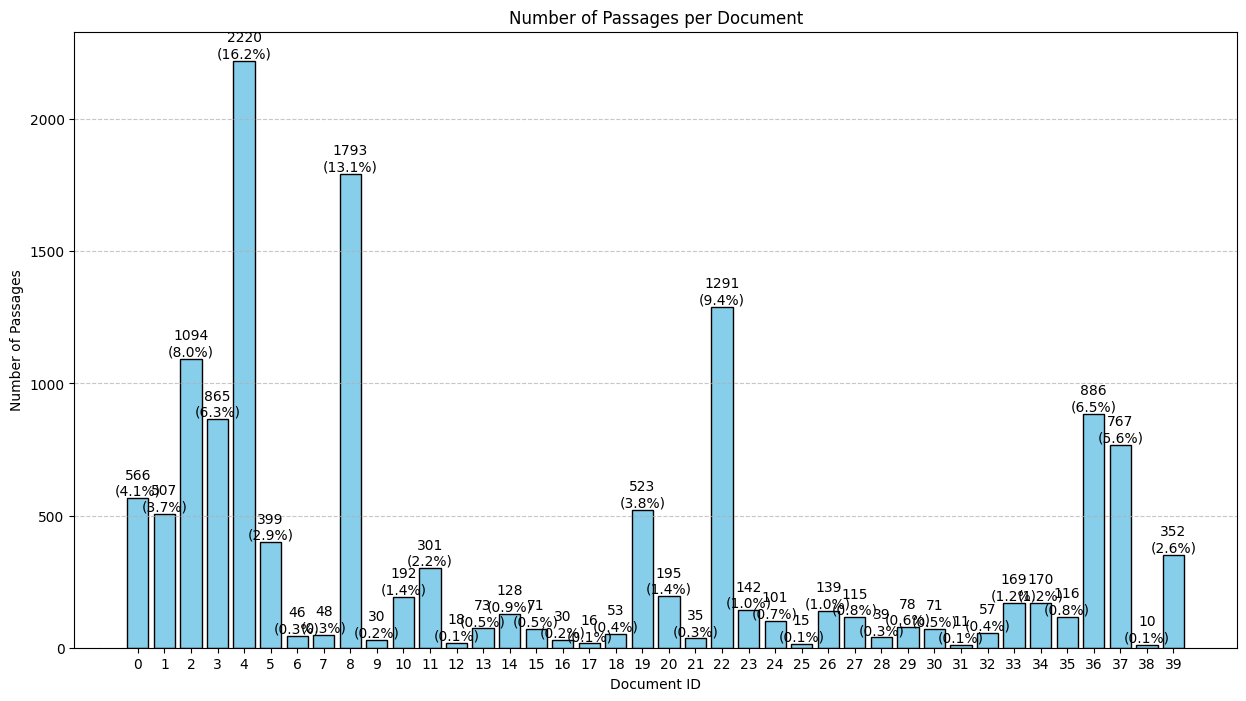

In [9]:
# Calculate the number of passages per document
num_passages_per_document = [len(doc) for doc in documents]

# Create a bar chart
document_ids = list(range(len(documents)))
plt.figure(figsize=(15, 8))
bars = plt.bar(document_ids, num_passages_per_document, color='skyblue', edgecolor='black')

# Add counts and percentages on top of the bars
total_count = sum(num_passages_per_document)
percentages = (np.array(num_passages_per_document) / total_count) * 100

for bar, count, percentage in zip(bars, num_passages_per_document, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{count}\n({percentage:.1f}%)', 
             ha='center', va='bottom')

plt.title('Number of Passages per Document')
plt.xlabel('Document ID')
plt.ylabel('Number of Passages')
plt.xticks(document_ids)  # Set x-ticks to show document IDs
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

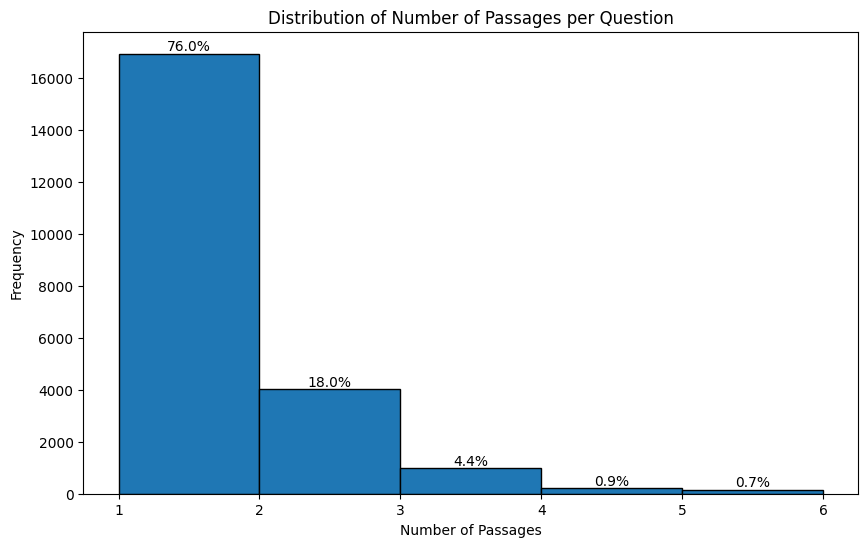

In [10]:
# Assuming 'questions' DataFrame has a column 'Passages' with lists of relevant passage IDs for each question
# Calculate the number of passages per question
questions['num_passages'] = questions['Passages'].apply(len)

# Plot the distribution of number of passages per question
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(questions['num_passages'], bins=range(1, questions['num_passages'].max() + 1), edgecolor='black', density=False)

# Calculate percentages
total_count = sum(counts)
percentages = (counts / total_count) * 100

# Add percentages on top of the bars
for count, x, percentage in zip(counts, bins[:-1], percentages):
    plt.text(x + 0.5, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Distribution of Number of Passages per Question')
plt.xlabel('Number of Passages')
plt.ylabel('Frequency')
plt.show()


## Prepare Data

In [11]:
id_casting = {(row[1]['DocumentID'],row[1]['PassageID']) : row[1]['ID'] for row in passages.iterrows()}
id_casting

{(1, '1.'): 'bd35fb2d-4de6-48fb-ab3c-baead722854f',
 (1, '1.1'): 'e563ad09-df80-435c-a497-eeec420efbc4',
 (1, '1.1.1'): '8edbc54b-4d98-4417-a4b7-3531b6f80f8c',
 (1, '1.1.1.(1)'): '1389d0fa-5346-4953-8d52-45d7fd96c5e8',
 (1, '1.1.1.(2)'): '23368989-55c6-4940-abc6-d7a8d2d1071b',
 (1, '1.2'): '752659a9-d3f6-416f-ba24-64d290addf6e',
 (1, '1.2.1'): '02c6eb29-dbde-426d-948d-45ea309bc341',
 (1, '1.2.1.(1)'): '27ce8ea5-92f0-4c42-8d87-15487ff38312',
 (1, '1.2.1.(2)'): 'f2a0a728-9d5e-4349-89e4-1d8a2ba5f6e0',
 (1, '1.2.1.Guidance'): '7c1af8c3-ef07-451b-a52d-f7637da2c2d5',
 (1, '1.2.1.Guidance.1.'): 'e232dec1-7c39-4af1-a9df-7a680ca97af5',
 (1, '1.2.1.Guidance.2.'): 'cb391e87-9024-4e63-ac62-95ecf9297697',
 (1, '1.2.1.Guidance.3.'): 'a9071a86-80c2-46fc-b124-8f94e11ab399',
 (1, '1.3'): 'fd448e80-96c3-40a0-a9b9-2b3800848990',
 (1, '1.3.1'): '39eb5544-f7f0-4b8e-945b-d6d9e0a3cf6e',
 (1, '1.3.2'): '6e789b27-670d-4f36-9f49-d704ae07d9e1',
 (1, '1.3.3'): '7859e510-2125-4b50-8a77-7867457b8179',
 (1, '1.3.3.(

In [12]:
question_texts, candidate_passages = questions['Question'], questions['Passages'].apply(lambda X: [id_casting[(x['DocumentID'],x['PassageID'])] for x in X])
question_texts,candidate_passages

(0        Under Rules 7.3.2 and 7.3.3, what are the two ...
 1        **Best Execution and Transaction Handling**: W...
 2        How does the FSRA define and evaluate "princip...
 3        How soon is the Registrar of Companies expecte...
 4        Can the ADGM provide examples of legal risks a...
                                ...                        
 22290    Can you provide guidance on how frequently upd...
 22291    What are the reporting requirements for Financ...
 22292    What are the penalties for non-compliance with...
 22293    If a communication references an investment th...
 22294    Are there any exemptions or special considerat...
 Name: Question, Length: 22295, dtype: object,
 0                   [33cf4590-6b60-4837-82ab-9970cd98b532]
 1                   [60f7507b-7582-4d9b-8e9c-1e5a8ceeaf5e]
 2                   [7a2d0ef0-9522-4b20-8c0f-f7451a823073]
 3                   [20d6f677-9f6a-4f73-8baf-3272d77b3390]
 4        [44596fcf-2964-420e-9150-6d5c98e22f61, 7195

In [13]:
# Create a mapping of ID to its index in the DataFrame
id_to_index = {row['ID']: index for index, row in passages.iterrows()}

# Replace IDs with their indexes
index_list = [[id_to_index[id_] for id_ in sublist] for sublist in candidate_passages]

len(index_list)

22295

In [14]:
def one_hot_encode(indexes, length):
    # Initialize a list of zeros with the specified length
    one_hot = [0.0] * length
    # Set the positions of the indexes to 1
    for index in indexes:
        if index < length:  # Ensure index is within bounds
            one_hot[index] = 1.0
    return one_hot

# Example indexes and length
indexes = [1, 4]
length = 6

# Generate the one-hot encoded list
result = one_hot_encode(indexes, length)
result

[0.0, 1.0, 0.0, 0.0, 1.0, 0.0]

In [15]:
y_labels = []
labels_length = passages.shape[0]
for t in index_list:
    y_labels.append(one_hot_encode(t, labels_length))
np.array(y_labels).shape

(22295, 13732)

In [16]:
from transformers import AutoTokenizer

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# Tokenize questions (no passage content included)
encodings = tokenizer(question_texts.to_list(), truncation=True, padding=True, max_length=512, return_tensors="pt")


c:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
encodings['input_ids'].shape

torch.Size([22295, 118])

## Model

In [18]:
from transformers import AutoModelForSequenceClassification
import torch.nn as nn

# Load the RoBERTa model
class PassageClassificationModel(nn.Module):
    def __init__(self, base_model_name, num_labels):
        super(PassageClassificationModel, self).__init__()
        # Load RoBERTa model and attach classification head
        self.roberta = AutoModelForSequenceClassification.from_pretrained(base_model_name, num_labels=num_labels)
    
    def forward(self, input_ids, attention_mask):
        # Forward pass through RoBERTa
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.logits  # Return the logits for each candidate passage

# Instantiate the model
model = PassageClassificationModel(base_model_name="roberta-base", num_labels=labels_length)

# Freeze the backbone layers
for param in model.roberta.base_model.parameters():
    param.requires_grad = False


model.to(device)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


PassageClassificationModel(
  (roberta): RobertaForSequenceClassification(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(50265, 768, padding_idx=1)
        (position_embeddings): Embedding(514, 768, padding_idx=1)
        (token_type_embeddings): Embedding(1, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): RobertaEncoder(
        (layer): ModuleList(
          (0-11): 12 x RobertaLayer(
            (attention): RobertaAttention(
              (self): RobertaSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): RobertaSelfOutput(
      

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# Define hyperparameters
learning_rate = 1e-2
epochs = 6

# Prepare DataLoader for training
train_dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], torch.tensor(y_labels))
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# Training loop
model.train()
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    epoch_loss = 0
    
    for batch in tqdm(train_loader):
        # Move batch to GPU
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        optimizer.zero_grad()

        # Forward pass
        logits = model(input_ids=input_ids, attention_mask=attention_mask)
        # Since labels is a list of relevant passage indices, calculate cross-entropy for relevant passages
        loss = nn.CrossEntropyLoss()(logits, labels)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    print(f"Epoch {epoch + 1} Loss: {epoch_loss / len(train_loader)}")

print("Training complete!")


Epoch 1/6


100%|██████████| 88/88 [07:32<00:00,  5.14s/it]


Epoch 1 Loss: 12.864626190879129
Epoch 2/6


100%|██████████| 88/88 [07:31<00:00,  5.13s/it]


Epoch 2 Loss: 12.523926995017312
Epoch 3/6


100%|██████████| 88/88 [07:31<00:00,  5.13s/it]


Epoch 3 Loss: 11.753205960447138
Epoch 4/6


100%|██████████| 88/88 [07:31<00:00,  5.13s/it]


Epoch 4 Loss: 11.254309264096348
Epoch 5/6


 85%|████████▌ | 75/88 [06:28<01:07,  5.19s/it]

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# Define hyperparameters
learning_rate = 1e-3
epochs = 6

# Prepare DataLoader for training
train_dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], torch.tensor(y_labels))
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# Training loop
model.train()
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    epoch_loss = 0
    
    for batch in tqdm(train_loader):
        # Move batch to GPU
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        optimizer.zero_grad()

        # Forward pass
        logits = model(input_ids=input_ids, attention_mask=attention_mask)
        # Since labels is a list of relevant passage indices, calculate cross-entropy for relevant passages
        loss = nn.CrossEntropyLoss()(logits, labels)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    print(f"Epoch {epoch + 1} Loss: {epoch_loss / len(train_loader)}")

print("Training complete!")


In [ ]:
from torch.nn.functional import softmax

def predict_most_relevant_passages(model, input_ids, attention_mask):
    model.eval()
    with torch.no_grad():
        logits = model(input_ids=input_ids, attention_mask=attention_mask).to(device)
        probabilities = softmax(logits, dim=1).to(device)
        
        # Get top passages by probability
        top_passages = torch.topk(probabilities, k=20, dim=1)  # k=3 to get top 3 relevant passages
        return top_passages

# Example of running inference
sample_input_ids = (encodings['input_ids'][:1]).to(device)  # Select a single question for demonstration
sample_attention_mask = (encodings['attention_mask'][:1]).to(device)
top_passages = predict_most_relevant_passages(model, sample_input_ids, sample_attention_mask)

print("Top passages indices:", top_passages.indices)
print("Top passages probabilities:", top_passages.values)
print("Real",index_list[0] )

Top passages indices: tensor([[10420, 10932, 10918, 10936, 13681, 11677, 10924, 10922,  8622,  8618,
         13651,  9127, 10982,  1908,  1986, 10916, 11003, 10925, 11665, 10419]],
       device='cuda:0')
Top passages probabilities: tensor([[0.0056, 0.0048, 0.0045, 0.0043, 0.0042, 0.0042, 0.0039, 0.0038, 0.0035,
         0.0032, 0.0032, 0.0031, 0.0030, 0.0028, 0.0028, 0.0028, 0.0028, 0.0027,
         0.0026, 0.0025]], device='cuda:0')
Real [7980]


## Evaluate

## Base Line

In [ ]:
# # %git clone https://github.com/RegNLP/ObliQADataset.git
# %pip install faiss-cpu pyserini==0.22.1
# %wget https://gist.githubusercontent.com/kwang2049/63ed76eb0f4d79ca81caecdb06897bfb/raw/1d86978275d666dff904fba65a34ce3e71b3cf1d/bm25.py

In [ ]:
import os
import json
from typing import Dict

def load_qrels(docs_dir: str, fqrels: str) -> Dict[str, Dict[str, int]]:
    ndocs = 40
    docs = []
    for i in range(1, ndocs + 1):
        with open(os.path.join(docs_dir, f"{i}.json")) as f:
            doc = json.load(f)
            docs.append(doc)

    did2pid2id: Dict[str, Dict[str, str]] = {}
    for doc in docs:
        for psg in doc:
            did2pid2id.setdefault(psg["DocumentID"], {})
            assert psg["ID"] not in did2pid2id[psg["DocumentID"]]
            did2pid2id[psg["DocumentID"]].setdefault(psg["PassageID"], psg["ID"])

    with open(fqrels) as f:
        data = json.load(f)
    qrels = {}
    for e in data:
        qid = e["QuestionID"]
        for psg in e["Passages"]:
            qrels.setdefault(qid, {})
            pid = did2pid2id[psg["DocumentID"]][psg["PassageID"]]
            qrels[qid][pid] = 1
    return qrels

In [ ]:
qrels = load_qrels("data/StructuredRegulatoryDocuments", "data/ObliQA_test.json")
with open("qrels", "w") as f:
    for qid, rels in qrels.items():
        for pid, rel in rels.items():
            line = f"{qid} Q0 {pid} {rel}"
            f.write(line + "\n")

In [ ]:
from bm25 import BM25, Document, Query

bm25 = BM25()
ndocs = 40
collection = []
for i in range(1, ndocs + 1):
    with open(os.path.join("data/StructuredRegulatoryDocuments", f"{i}.json")) as f:
        doc = json.load(f)
        for psg in doc:
          collection.append(Document(psg["ID"], "", psg["PassageID"] + " " + psg["Passage"]))
bm25.index(iter(collection), len(collection), "./index")

ModuleNotFoundError: No module named 'bm25'

In [ ]:
queries = []
with open("ObliQADataset/ObliQA_test.json") as f:
    data = json.load(f)
    for e in data:
      queries.append(Query(e["QuestionID"], e["Question"]))
retrieved = bm25.search(
    queries=queries,
    index_path="./index",
    topk=10,
    batch_size=1,
)
with open("rankings.trec", "w") as f:
  for qid, hits in retrieved.items():
    for i, hit in enumerate(sorted(hits, key=lambda hit:hit.score, reverse=True)):
      line = f"{qid} 0 {hit.docid} {i+1} {hit.score} bm25"
      f.write(line + "\n")